#  Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Importing Evaluation matrces
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

# Reading Dataset

In [2]:
df = pd.read_csv(r'train.csv')
df_test = pd.read_csv("test.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df_test.shape

(418, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploratory Data Analysis

In [7]:
# Function to show percentage on bars
def per_on_bar(plot,feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

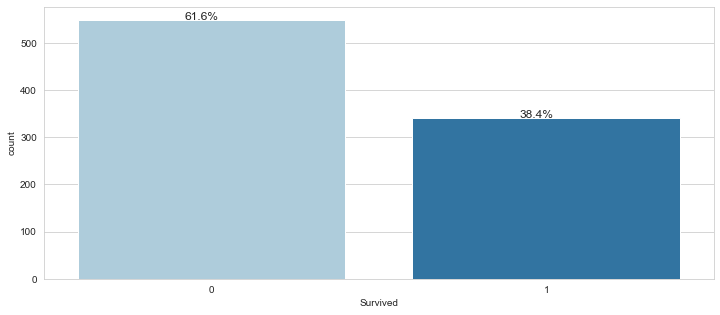

In [8]:
plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")
ax = sns.countplot(df.Survived, palette=sns.palettes.color_palette("Paired"))
per_on_bar(ax, df.Survived)

We can see that **61**% were died and only **39**% were survived.

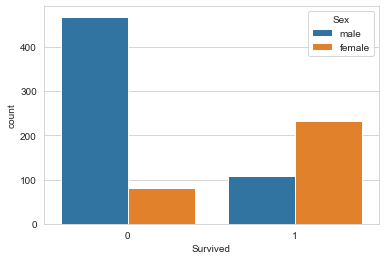

In [9]:
sns.countplot(data=df, x='Survived',hue='Sex') 
plt.show()

By looking at the relationship of Sex and Survived we can see most of Female Passengers were survived.

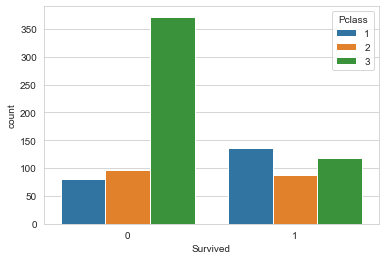

In [10]:
sns.countplot(data=df, x='Survived', hue='Pclass')
plt.show()

Peoples who stayed in 1st class were survived most, but the difference is not very much.

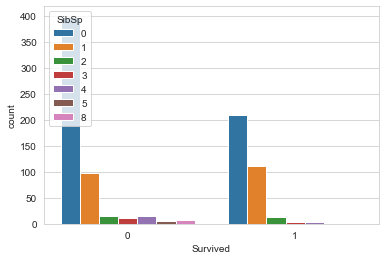

In [11]:
sns.countplot(data=df, x='Survived', hue='SibSp')
plt.show()

Most peoples were survived who were having Less number of siblings.

# Conclusion

From all of this analysis we draw following conclusions
- Almost **61** people were Died.
- If one will look in the gender approach then one can say women were more likely to survive.
- The upper-class passengers more likely to survive than lower-class passengers.
- Most peoples were survived who were having Less number of siblings.

## Data Preprocessing

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
# Dropping Cabin because it is having most of the null values
df= df.drop('Cabin', axis=1 )
df_test = df_test.drop("Cabin", axis=1)

# Dropping null valus from Embarked column
df= df.dropna(subset=['Embarked'], axis=0)

# Filling NAN values of age feature
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda val: val.fillna(val.mean()))
df_test['Age'] = df_test.groupby('Pclass')['Age'].transform(lambda val: val.fillna(val.mean()))
df_test.Fare.fillna(df_test.Fare.mean(), inplace=True)

In [15]:
# Separating Numerical and categorical features
df_num= df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
df_obj=df[['Sex', 'Embarked']]

# Converting categorical data into integers using One Hot Encoding
df_obj= pd.get_dummies(df_obj, drop_first=True)

# Concatnating Numerical and categorical features
df = pd.concat([df_num, df_obj], axis=1)

In [16]:
# Separating Numerical and categorical features
df_num = df_test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
df_obj = df_test[['Sex', 'Embarked']]

# Converting categorical data into integers using One Hot Encoding
df_obj= pd.get_dummies(df_obj, drop_first=True)

# Concatnating Numerical and categorical features
df_test = pd.concat([df_num, df_obj], axis=1)

# Data Preparation for Model

In [17]:
# Spliting into Dependent and independent features
X=df.drop('Survived', axis=1)
y=df['Survived']

In [18]:
# Balancing data
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
X, y = sampler.fit_resample(X, y)

In [19]:
# Spliting into train test part
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
# Scaling Data 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test= scaler.fit_transform(X_test)

# Building Model

In [27]:
len(X_test)

330

+ ==================================================================================================== +
			1-For LogisitcRegression The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.8303030303030303
--------------------------------------------------
F1 :  [0.83030303 0.83030303]
--------------------------------------------------
Reacll :  [0.86708861 0.79651163]
--------------------------------------------------
Precision :  [0.79651163 0.86708861]
--------------------------------------------------
Confusion Matrix....
 [[137  21]
 [ 35 137]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       158
           1       0.87      0.80      0.83       172

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
wei

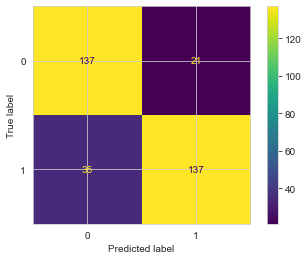

							-----------------------------------------------------------
							 Time for detection (LogisitcRegression) : 0.5 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For KNeighborsClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.7333333333333333
--------------------------------------------------
F1 :  [0.70666667 0.75555556]
--------------------------------------------------
Reacll :  [0.67088608 0.79069767]
--------------------------------------------------
Precision :  [0.74647887 0.72340426]
--------------------------------------------------
Confusion Matrix....
 [[106  52]
 [ 36 136]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0      

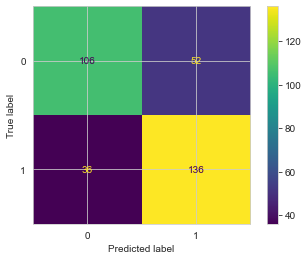

							-----------------------------------------------------------
							 Time for detection (KNeighborsClassifier) : 0.467 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For RandomForestClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.8333333333333334
--------------------------------------------------
F1 :  [0.82866044 0.83775811]
--------------------------------------------------
Reacll :  [0.84177215 0.8255814 ]
--------------------------------------------------
Precision :  [0.81595092 0.8502994 ]
--------------------------------------------------
Confusion Matrix....
 [[133  25]
 [ 30 142]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0

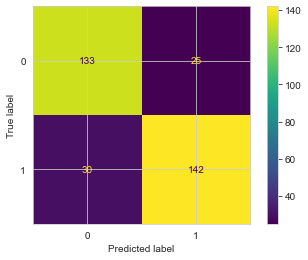

							-----------------------------------------------------------
							 Time for detection (RandomForestClassifier) : 0.954 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For DecisionTreeClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.803030303030303
--------------------------------------------------
F1 :  [0.79876161 0.80712166]
--------------------------------------------------
Reacll :  [0.8164557  0.79069767]
--------------------------------------------------
Precision :  [0.78181818 0.82424242]
--------------------------------------------------
Confusion Matrix....
 [[129  29]
 [ 36 136]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           

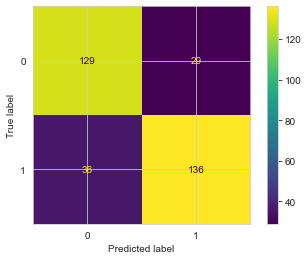

							-----------------------------------------------------------
							 Time for detection (DecisionTreeClassifier) : 0.43 seconds...
							-----------------------------------------------------------



In [23]:
# check the performance on diffrent regressor
models = []
models.append(('LogisitcRegression', LogisticRegression()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))


# metrices to store performance
acc = []
pre = []
f1 = []
con = []
rec = []


import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # predict values
    y_pred = clf.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    # Precision
    precision = precision_score(y_test, y_pred, average=None)
    pre.append(precision)
    # Recall
    recall = recall_score(y_test, y_pred, average=None)
    rec.append(recall)
    # F1 Score
    f1_sco = f1_score(y_test, y_pred, average=None)
    f1.append(f1_sco)
    # Confusion Matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    con.append(confusion_mat)
    # Report
    report = classification_report(y_test, y_pred)


    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Accuracy : ', accuracy)   
    print("-"*50)
    print('F1 : ', f1_sco)
    print("-"*50)
    print('Reacll : ', recall)
    print("-"*50)
    print('Precision : ', precision)
    print("-"*50)
    print('Confusion Matrix....\n', confusion_mat)
    print("-"*50)
    print('Classification Report....\n', report)
    print("-"*50)
    print('Plotting Confusion Matrix...\n')
    plot_confusion_matrix(clf, X_test, y_test)
    plt.show()


    
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()
    


In [24]:
comp = pd.DataFrame({"Model": dict(models).keys(), "Accuracy": acc, "Precision": pre, "Recall": rec, "F1_Score": f1, "Confusion Matrix": con})
comp

,Model,Accuracy,Precision,Recall,F1_Score,Confusion Matrix
0,LogisitcRegression,0.830303,"[0.7965116279069767, 0.8670886075949367]","[0.8670886075949367, 0.7965116279069767]","[0.8303030303030303, 0.8303030303030303]","[[137, 21], [35, 137]]"
1,KNeighborsClassifier,0.733333,"[0.7464788732394366, 0.723404255319149]","[0.6708860759493671, 0.7906976744186046]","[0.7066666666666667, 0.7555555555555555]","[[106, 52], [36, 136]]"
2,RandomForestClassifier,0.833333,"[0.8159509202453987, 0.8502994011976048]","[0.8417721518987342, 0.8255813953488372]","[0.8286604361370717, 0.8377581120943953]","[[133, 25], [30, 142]]"
3,DecisionTreeClassifier,0.803030,"[0.7818181818181819, 0.8242424242424242]","[0.8164556962025317, 0.7906976744186046]","[0.7987616099071208, 0.8071216617210683]","[[129, 29], [36, 136]]"


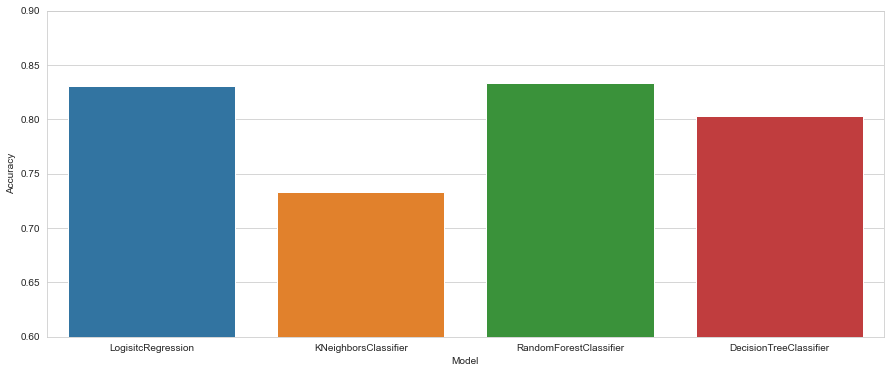

In [29]:
plt.figure(figsize=(15, 6))
sns.barplot(x=comp.Model, y=comp.Accuracy)
plt.ylim(0.6, 0.9)
plt.show()